In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [48]:
df=pd.read_csv(r'D:\Learnbay ML and AI\hour.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
#data_exploration

In [52]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

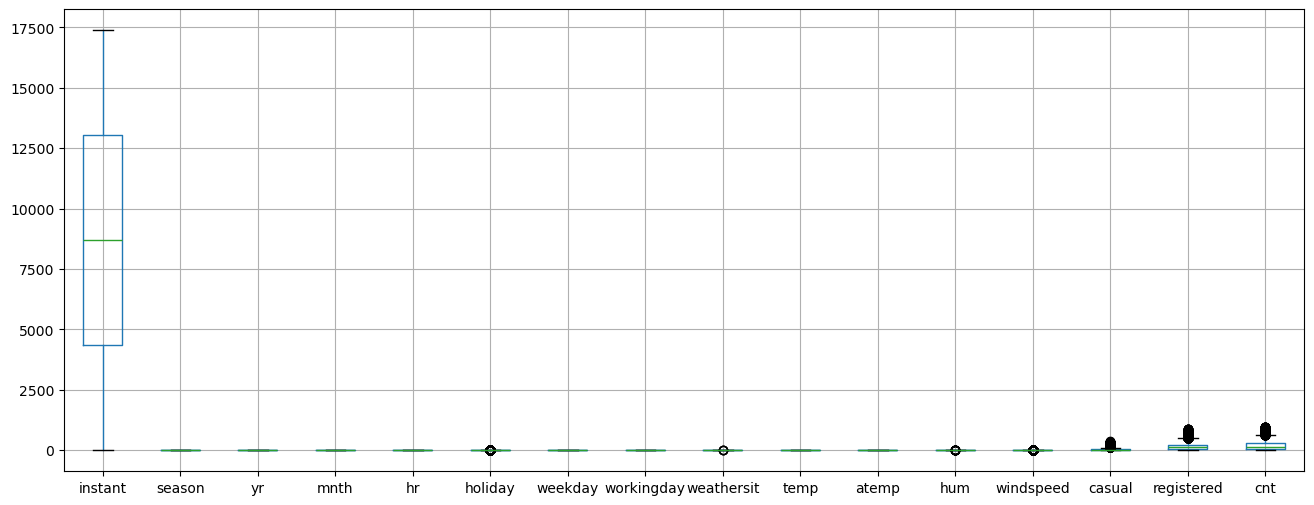

In [54]:
plt.figure(figsize= (16,6))
df.boxplot()
plt.show()

In [55]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


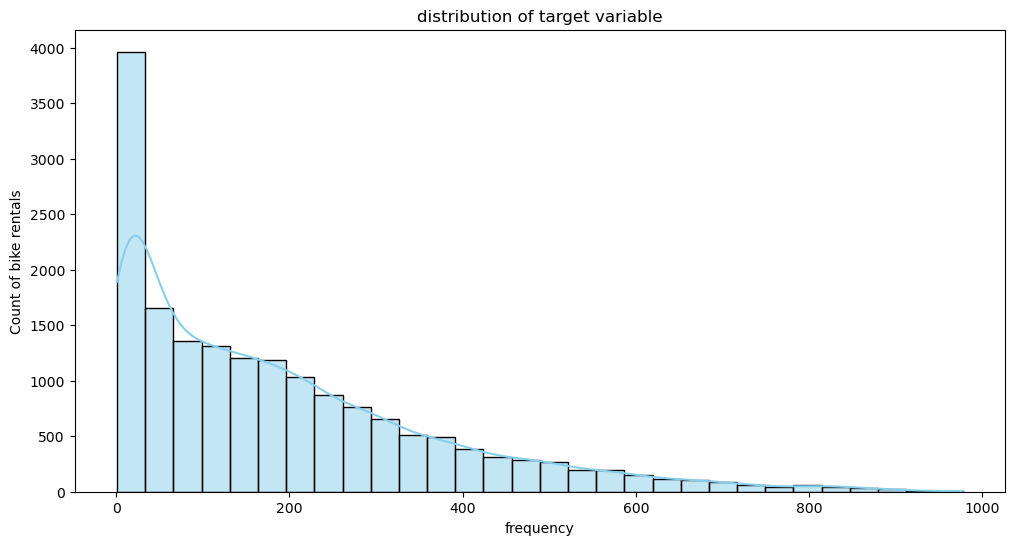

In [56]:
#distribution of target variable through visualization
plt.figure(figsize=(12,6))
sns.histplot(df['cnt'],bins=30,kde=True, color='skyblue')
plt.title('distribution of target variable')
plt.xlabel('frequency')
plt.ylabel('Count of bike rentals')
plt.show()

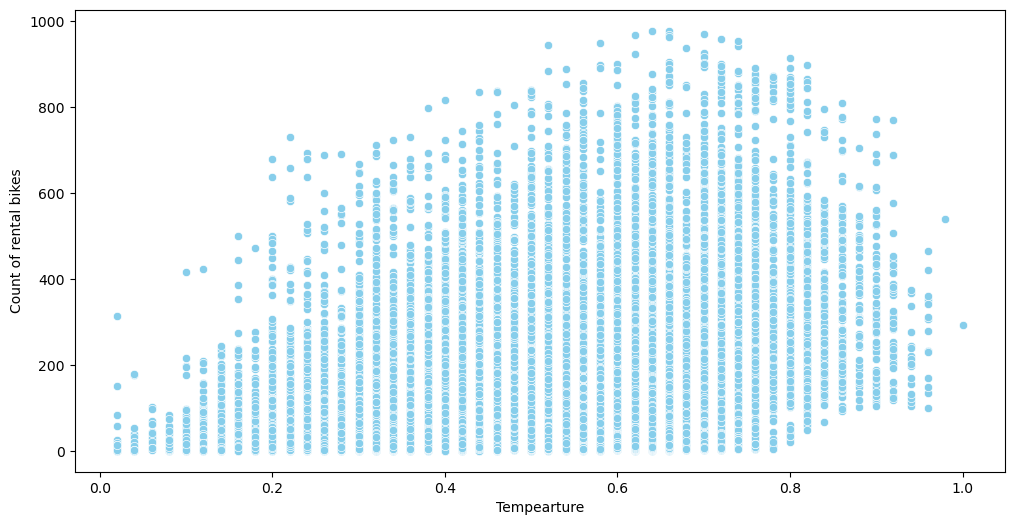

In [57]:
#relation between tempearture and bike rentals

plt.figure(figsize=(12,6))
sns.scatterplot(x='temp',y='cnt',data=df,color='skyblue')
plt.xlabel('Tempearture')
plt.ylabel('Count of rental bikes')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_980\2020108500.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr',y='cnt', data=df,estimator='mean', ci=None, color='skyblue')


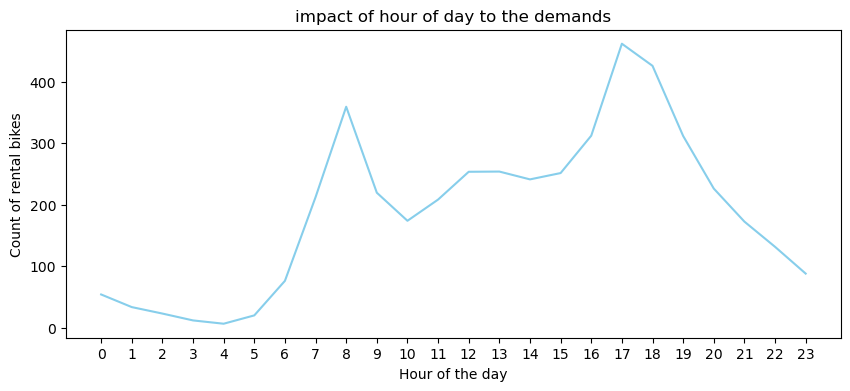

In [58]:
#impact of hour of day to the demands

plt.figure(figsize=(10,4))
sns.lineplot(x='hr',y='cnt', data=df,estimator='mean', ci=None, color='skyblue')
plt.title('impact of hour of day to the demands')
plt.xlabel('Hour of the day')
plt.ylabel('Count of rental bikes')
plt.xticks(range(0,24))
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_980\1576812583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, palette='viridis', estimator='mean')


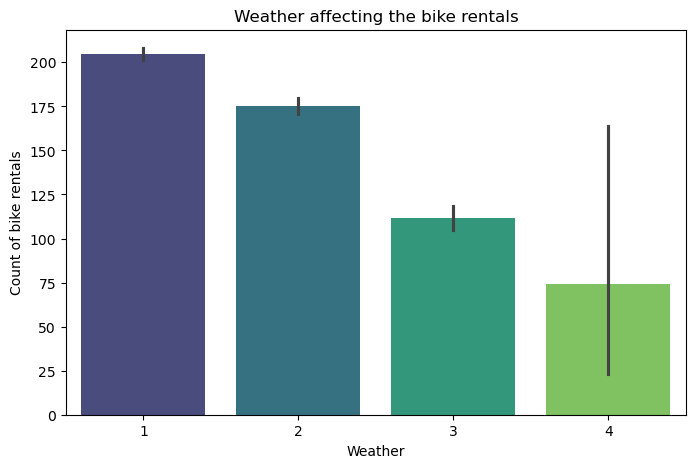

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=df, palette='viridis', estimator='mean')
plt.title('Weather affecting the bike rentals')
plt.xlabel('Weather')
plt.ylabel('Count of bike rentals')
plt.show()

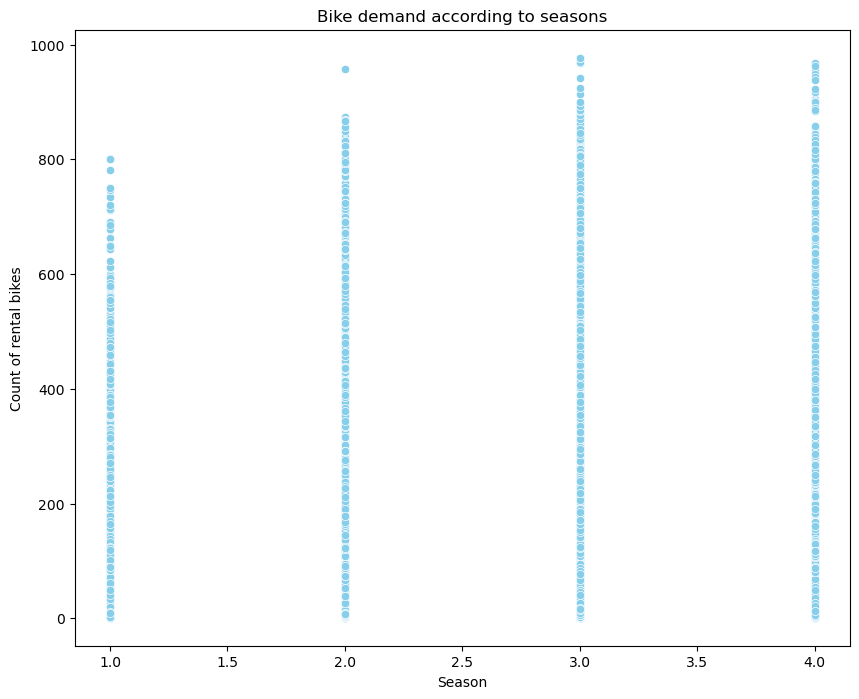

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='season', y='cnt', data=df, color='skyblue')
plt.title('Bike demand according to seasons')
plt.xlabel('Season')
plt.ylabel('Count of rental bikes')
plt.show()

In [61]:
x_lin=df[['temp']]
x=df[['mnth','hr','season','weathersit','temp']]
y=df.iloc[:,-1]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_lin,x_test_lin,y_train_lin,y_test_lin=train_test_split(x_lin,y,test_size=0.2,random_state=42)

In [63]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_lin)
x_test_scaled=scaler.transform(x_test_lin)


In [64]:
#linear regression ---  model 1
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train_lin)
y_pred_lin=lin_reg.predict(x_test_scaled)

In [65]:
#performance metrics
print('\n----Metrics evaluation----')
mae_lin=mean_absolute_error(y_test,y_pred_lin)
print(f'Mean absolute error: {mae_lin: .4f}')
rmse_lin=root_mean_squared_error(y_test,y_pred_lin)
print(f'Root mean squared error: {rmse_lin: .4f}')
r2_lin=r2_score(y_test,y_pred_lin)
print(f'R2 score : {r2_lin: .4f}')


----Metrics evaluation----
Mean absolute error:  123.1529
Root mean squared error:  162.3685
R2 score :  0.1674


In [66]:
#multiple regression
multi=LinearRegression()
multi.fit(x_train,y_train)
y_pred_multi=multi.predict(x_test)

In [67]:
#performance metrics
print('\n----Metrics evaluation----')
mae_multi=mean_absolute_error(y_test,y_pred_multi)
print(f'Mean absolute error: {mae_multi: .4f}')
rmse_multi=root_mean_squared_error(y_test,y_pred_multi)
print(f'Root mean squared error: {rmse_multi: .4f}')
r2_multi=r2_score(y_test,y_pred_multi)
print(f'R2 score : {r2_multi: .4f}')


----Metrics evaluation----
Mean absolute error:  110.5571
Root mean squared error:  148.7111
R2 score :  0.3016


In [68]:
results = pd.DataFrame({
    'Model': ['Simple Linear (Temp)', 'Multiple Linear', ],
    'MAE': [mae_lin, mae_multi],
    'R2': [r2_lin, r2_multi ],
    'RMSE': [rmse_lin, rmse_multi]
})

print("\n--- Model Comparison ---")
print(results)


--- Model Comparison ---
                  Model         MAE        R2        RMSE
0  Simple Linear (Temp)  123.152874  0.167434  162.368545
1       Multiple Linear  110.557107  0.301605  148.711060


In [70]:
#polynomial features degree 2
scaler=StandardScaler()
x_train_scaled2=scaler.fit_transform(x_train)
x_test_scaled2=scaler.transform(x_test)

poly2= PolynomialFeatures(degree=2, include_bias=False)
x_train_poly2=poly2.fit_transform(x_train_scaled2)
x_test_poly2=poly2.transform(x_test_scaled2)

poly_reg2=LinearRegression()

poly_reg2.fit(x_train_poly2,y_train)
y_pred_poly2 = poly_reg2.predict(x_test_poly2)


In [71]:
#performance metrics

mae_poly2=mean_absolute_error(y_test,y_pred_poly2)
print(f'Mean absolute error: {mae_poly2:.4f}')
rmse_poly2=root_mean_squared_error(y_test,y_pred_poly2)
print(f'Root mean squared error: {rmse_poly2: .4f}')
r2_poly2=r2_score(y_test,y_pred_poly2)
print(f'R2 score: {r2_poly2: .4f}')

Mean absolute error: 99.3029
Root mean squared error:  131.9993
R2 score:  0.4498


In [84]:
#comparsion of models
results = pd.DataFrame({
    'Model': ['Simple Linear (Temp)', 'Polynomial Features deg 2', ],
    'MAE': [mae_lin, mae_poly2],
    'R2': [r2_lin, r2_poly2 ],
    'RMSE': [rmse_lin, rmse_poly2]
})

print("\n--- Model Comparison ---")
print(results)


--- Model Comparison ---
                       Model         MAE        R2        RMSE
0       Simple Linear (Temp)  123.152874  0.167434  162.368545
1  Polynomial Features deg 2   99.302901  0.449752  131.999327


In [73]:
#polynomial features with degree 3

poly3=PolynomialFeatures(degree=3, include_bias=False)
x_train_poly3=poly3.fit_transform(x_train_scaled2)
x_test_poly3=poly3.transform(x_test_scaled2)

poly_reg3=LinearRegression()
poly_reg3.fit(x_train_poly3,y_train)
y_pred_poly3=poly_reg3.predict(x_test_poly3)

In [74]:
#performance metrics
mae_poly3=mean_absolute_error(y_test,y_pred_poly3)
print(f'Mean absolute error : {mae_poly3:.4f}')
rmse_poly3=root_mean_squared_error(y_test,y_pred_poly3)
print(f'Root mean squared error: {rmse_poly3:.4f}')
r2_poly3=r2_score(y_test,y_pred_poly3)
print(f'R2 score: {r2_poly3:.4f}')

Mean absolute error : 87.7568
Root mean squared error: 122.8328
R2 score: 0.5235


In [75]:
#compaersion of models

#comparsion of models
results = pd.DataFrame({
    'Model': ['Polynomial_Features deg 2', 'Polynomial_Features deg 3', ],
    'MAE': [mae_poly2, mae_poly3],
    'R2': [r2_poly2, r2_poly3 ],
    'RMSE': [rmse_poly2, rmse_poly3]
})

print("\n--- Model Comparison ---")
print(results)


--- Model Comparison ---
                       Model        MAE        R2        RMSE
0  Polynomial_Features deg 2  99.302901  0.449752  131.999327
1  Polynomial_Features deg 3  87.756831  0.523521  122.832827


In [76]:
#performance of all models

results = pd.DataFrame({
    'Model': ['Linear regression','Polynomial_Features deg 2', 'Polynomial_Features deg 3', ],
    'MAE': [mae_lin,mae_poly2, mae_poly3],
    'R2': [r2_lin,r2_poly2, r2_poly3 ],
    'RMSE': [rmse_lin,rmse_poly2, rmse_poly3]
})

print("\n--- Model Comparison ---")
print(results)


--- Model Comparison ---
                       Model         MAE        R2        RMSE
0          Linear regression  123.152874  0.167434  162.368545
1  Polynomial_Features deg 2   99.302901  0.449752  131.999327
2  Polynomial_Features deg 3   87.756831  0.523521  122.832827


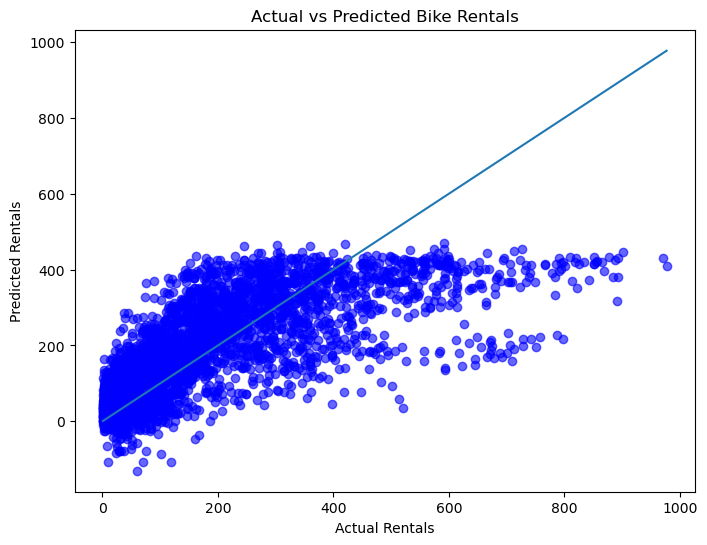

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_poly3, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title("Actual vs Predicted Bike Rentals")
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.show()

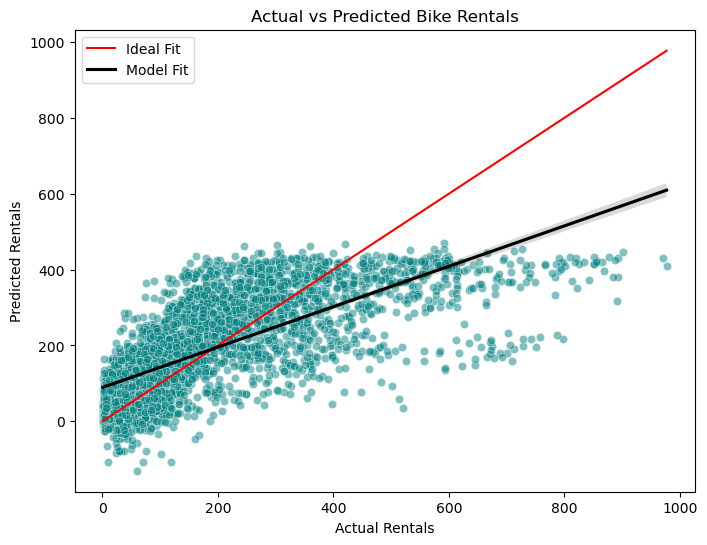

In [77]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.5, color='teal')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal Fit')
sns.regplot(x=y_test, y=y_pred_best, scatter=False, color='black', label='Model Fit')
plt.title("Actual vs Predicted Bike Rentals")
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.legend()
plt.show()


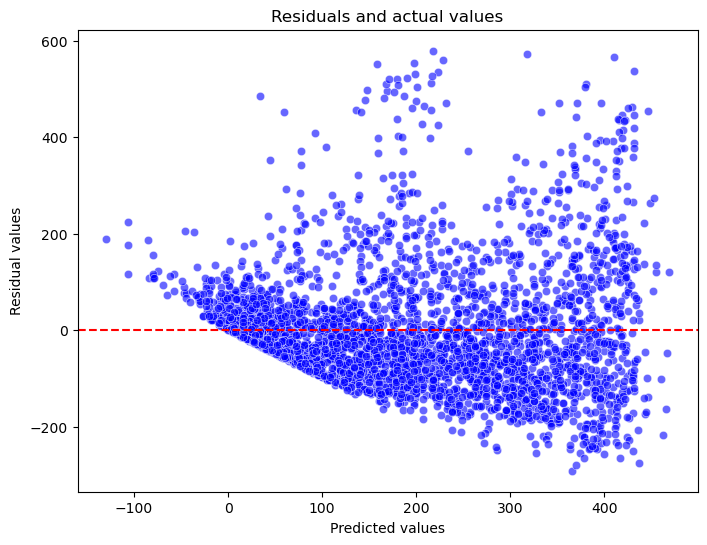

In [78]:
residuals= y_test - y_pred_poly3
y_pred_best=y_pred_poly3
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals and actual values')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.show()

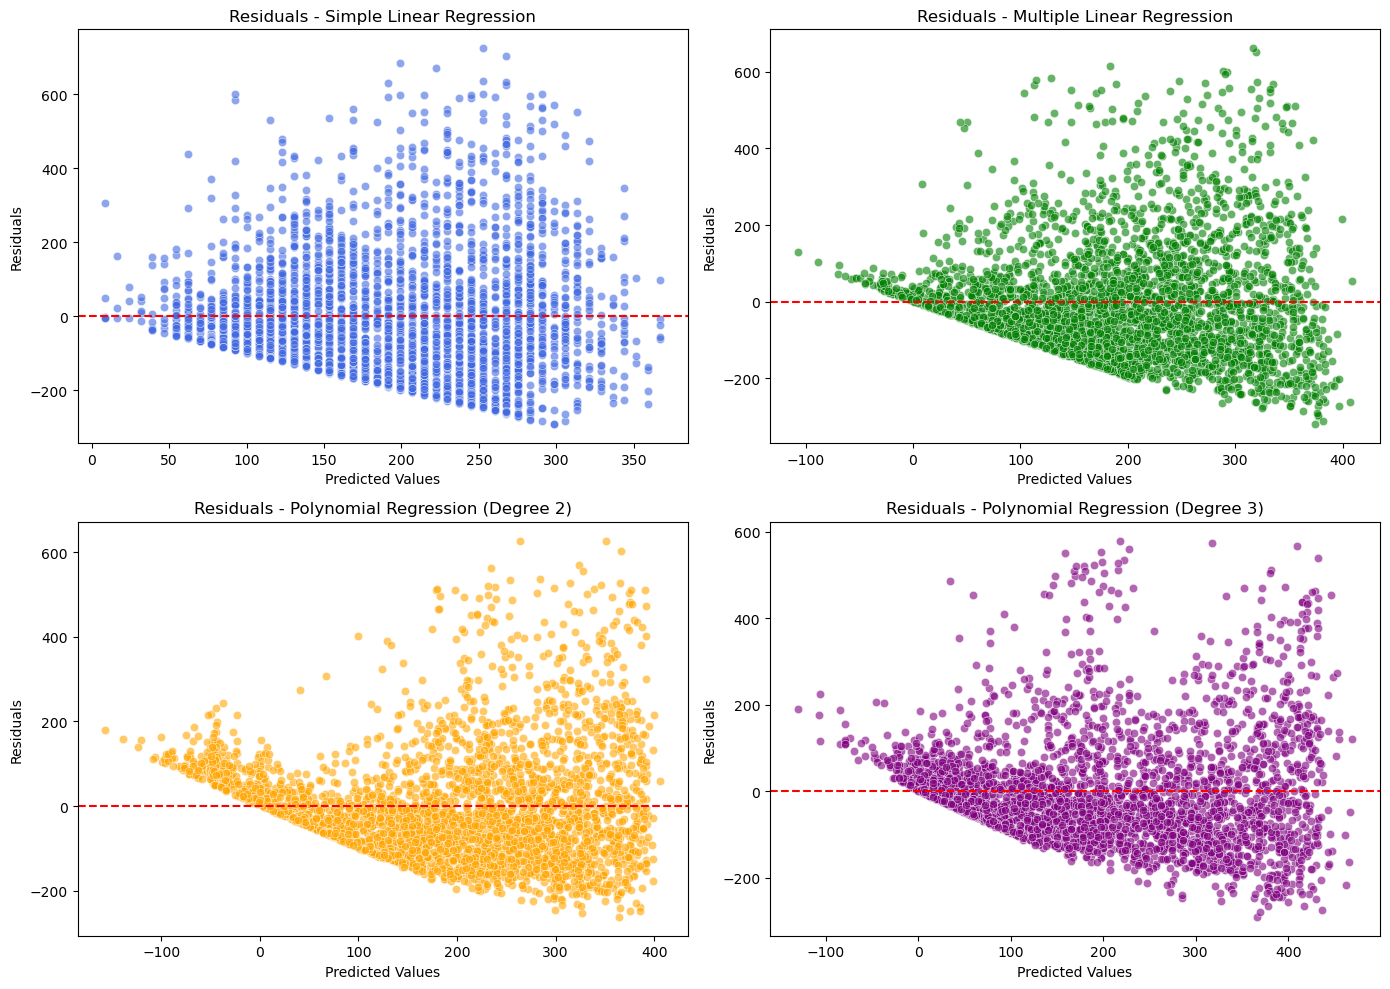

In [79]:

# Compute residuals
residuals_lin = y_test - y_pred_lin
residuals_multi = y_test - y_pred_multi
residuals_poly2 = y_test - y_pred_poly2
residuals_poly3 = y_test - y_pred_poly3

# --- Residual plots for each model ---
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_lin, y=residuals_lin, color='royalblue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals - Simple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_multi, y=residuals_multi, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals - Multiple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred_poly2, y=residuals_poly2, color='orange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals - Polynomial Regression (Degree 2)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred_poly3, y=residuals_poly3, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals - Polynomial Regression (Degree 3)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


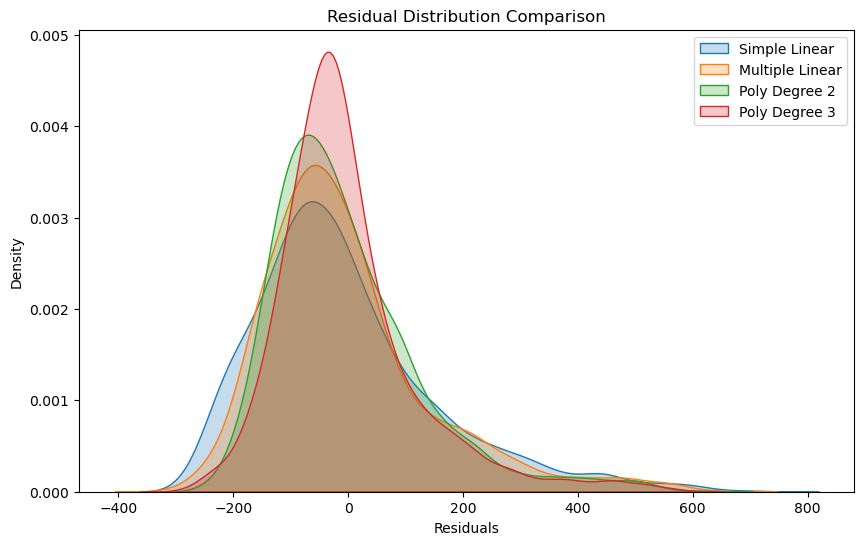

In [80]:
plt.figure(figsize=(10,6))
sns.kdeplot(residuals_lin, label='Simple Linear', fill=True)
sns.kdeplot(residuals_multi, label='Multiple Linear', fill=True)
sns.kdeplot(residuals_poly2, label='Poly Degree 2', fill=True)
sns.kdeplot(residuals_poly3, label='Poly Degree 3', fill=True)
plt.title('Residual Distribution Comparison')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()
